In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle_data=pandas.read_csv(url, sep='\t')
chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
chipotle_data.info()
chipotle_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [3]:
chipotle_data.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
items_quantity = chipotle_data.groupby('item_name')['quantity'].sum()
most_quantity = items_quantity.max()
print(most_quantity)
most_ordered_item = items_quantity.idxmax()
print(most_ordered_item)

761
Chicken Bowl


In [5]:
chipotle_data["item_price"]=chipotle_data["item_price"].str.replace("$","").astype(float)
total_revenue =(chipotle_data["item_price"]*chipotle_data["quantity"]).sum()
print(total_revenue)

39237.02


In [6]:
chipotle_data["order_id"].nunique()

1834

In [7]:
items_above10=len(chipotle_data[chipotle_data["item_price"]>10])
print(items_above10)


1130


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


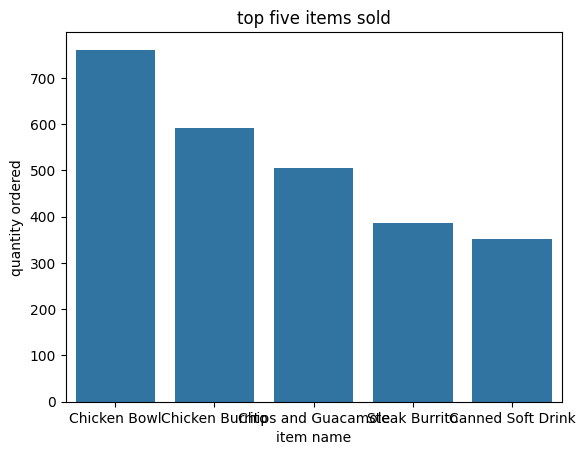

In [8]:
top5=items_quantity.nlargest(5)
print(top5)

seaborn.barplot(data=top5)
plt.xlabel("item name")
plt.ylabel("quantity ordered")
plt.title("top five items sold")
plt.show()

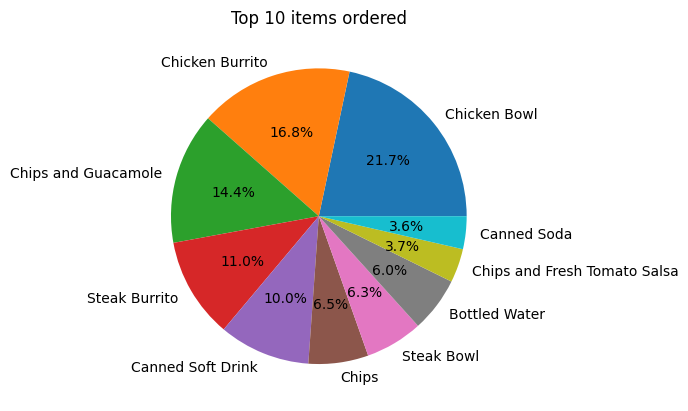

In [9]:
top_10_items = items_quantity.nlargest(10)
plt.pie(top_10_items, labels=top_10_items.index, autopct="%1.1f%%")
plt.title("Top 10 items ordered")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9824\3362976375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['total_price'] = filtered_data['item_price'] * filtered_data['quantity']


item_name
Bottled Water                    649.18
Canned Soda                      191.84
Canned Soft Drink                603.75
Chicken Bowl                    8044.63
Chicken Burrito                 6387.06
Chips                            580.34
Chips and Fresh Tomato Salsa    1033.96
Chips and Guacamole             2475.62
Steak Bowl                      2479.81
Steak Burrito                   4236.13
Name: total_price, dtype: float64

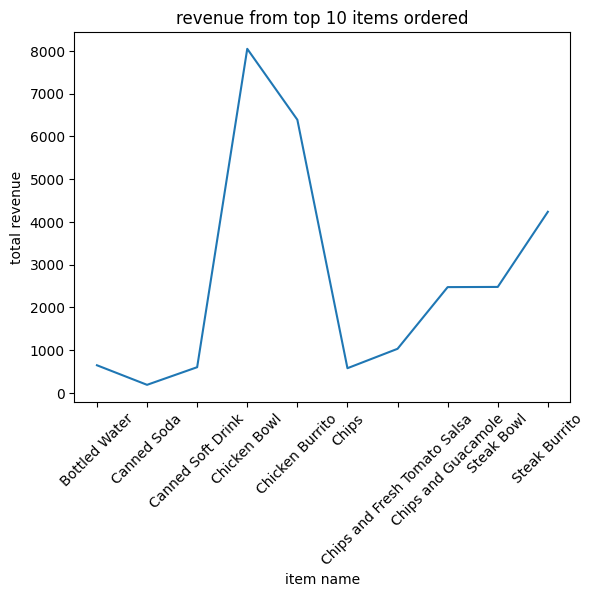

In [16]:
filtered_data = chipotle_data[chipotle_data['item_name'].isin(top_10_items.index)]
filtered_data['total_price'] = filtered_data['item_price'] * filtered_data['quantity']
top_10_revenue= filtered_data.groupby('item_name')['total_price'].sum()

display(top_10_revenue)

seaborn.lineplot(data=top_10_revenue)
plt.xlabel("item name")
plt.ylabel("total revenue")
plt.title("revenue from top 10 items ordered")
plt.xticks(rotation=45)
plt.show()



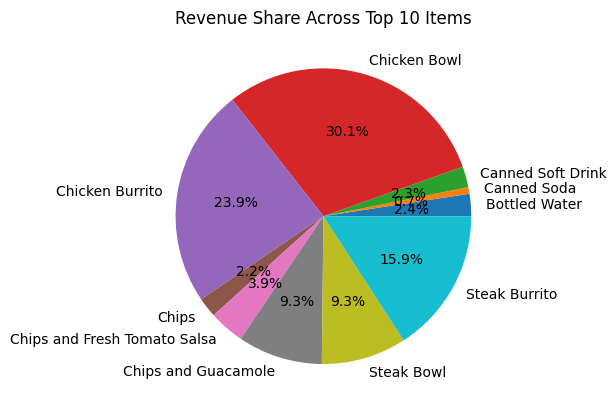

In [20]:
plt.pie(top_10_revenue, labels = top_10_revenue.index, autopct="%1.1f%%")
plt.title("Revenue Share Across Top 10 Items")
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_9824\2999055440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(data = top_10_revenue, palette = 'pastel')


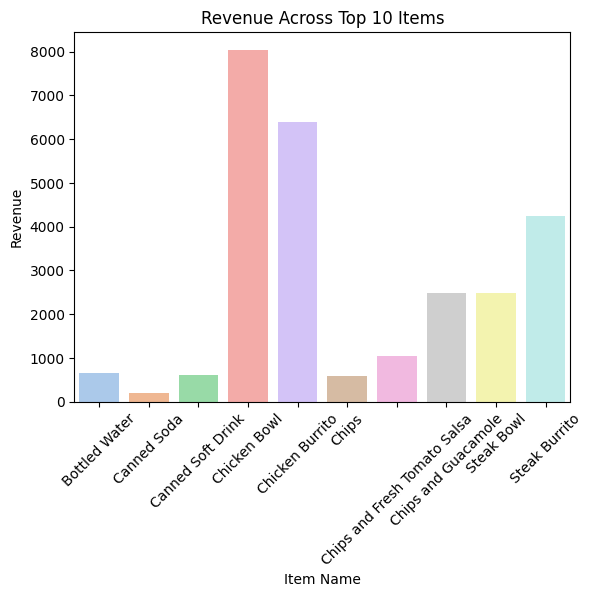

In [24]:
seaborn.barplot(data = top_10_revenue, palette = 'pastel')
plt.xlabel("Item Name")
plt.xticks(rotation = 45)
plt.ylabel("Revenue")
plt.title("Revenue Across Top 10 Items")
plt.show()